In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing functions for feature engineering
from config import BASE_PROCESSED_PATH
from features import add_rolling_stats, add_lag_features,scale_features,add_delta_features

In [3]:
#loading dataset
df = pd.read_csv(f'{BASE_PROCESSED_PATH}/FD001/train_FD001.csv')
df.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL,label_1
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0


In [4]:
df.shape

(20631, 28)

In [5]:
sensor_cols = [col for col in df.columns if 'sensor_' in col]
print(sensor_cols)

['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']


In [6]:
#Dropping uninformative or flatline sensors
flat_sensors = [col for col in sensor_cols if df[col].std() < 0.1]
print("Flat sensors:",flat_sensors)

Flat sensors: ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_8', 'sensor_10', 'sensor_13', 'sensor_15', 'sensor_16', 'sensor_18', 'sensor_19']


In [7]:
df.drop(columns=flat_sensors,inplace=True)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,sensor_11,sensor_12,sensor_14,sensor_17,sensor_20,sensor_21,RUL,label_1
17268,85,117,-0.0012,-0.0001,100.0,642.58,1590.60,1416.04,552.83,9053.15,47.65,521.03,8128.50,392,38.66,23.2665,71,0
1687,8,125,0.0010,0.0001,100.0,643.84,1593.45,1424.00,552.24,9053.79,47.99,520.68,8122.48,396,38.58,23.1815,25,1
5308,26,199,-0.0005,0.0003,100.0,643.51,1599.25,1432.50,551.79,9159.51,48.05,519.20,8222.42,398,38.27,22.9867,0,1
9943,51,35,-0.0010,0.0003,100.0,642.07,1584.53,1403.04,554.02,9065.98,47.15,522.16,8146.52,393,39.14,23.3543,178,0
5877,30,85,-0.0007,-0.0002,100.0,642.43,1582.33,1397.52,554.40,9058.01,47.25,522.01,8146.59,391,38.98,23.4296,109,0


In [8]:
#updating sensors by removing uninformative sensors
sensor_cols = [col for col in sensor_cols if col not in flat_sensors]
print(sensor_cols)

['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_14', 'sensor_17', 'sensor_20', 'sensor_21']


In [9]:
#rolling statistics
df = add_rolling_stats(df,sensor_cols)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_12_roll_mean,sensor_12_roll_std,sensor_14_roll_mean,sensor_14_roll_std,sensor_17_roll_mean,sensor_17_roll_std,sensor_20_roll_mean,sensor_20_roll_std,sensor_21_roll_mean,sensor_21_roll_std
10263,52,142,-0.0015,-0.0004,100.0,643.19,1594.68,1411.24,553.56,9068.47,...,520.966,0.336497,8137.956,3.874833,393.2,0.836660,38.838,0.121120,23.28900,0.076290
5472,28,8,-0.0002,0.0001,100.0,642.21,1589.79,1395.98,554.41,9054.45,...,522.644,0.240062,8143.726,3.386928,392.0,1.414214,39.044,0.047749,23.48880,0.075433
9272,48,8,0.0025,0.0001,100.0,641.90,1576.47,1397.54,553.93,9064.20,...,522.178,0.237318,8145.620,2.586571,392.2,1.303840,39.042,0.125579,23.36640,0.068899
4488,22,126,0.0015,-0.0002,100.0,643.15,1590.66,1411.33,553.53,9048.86,...,520.820,0.179025,8126.250,3.522102,393.8,0.836660,38.722,0.139893,23.20920,0.046493
13641,69,11,0.0000,-0.0003,100.0,642.50,1594.77,1406.42,554.17,9056.90,...,522.322,0.200674,8138.424,3.889020,392.2,1.095445,38.916,0.103102,23.38194,0.058262


In [10]:
df.shape

(20631, 40)

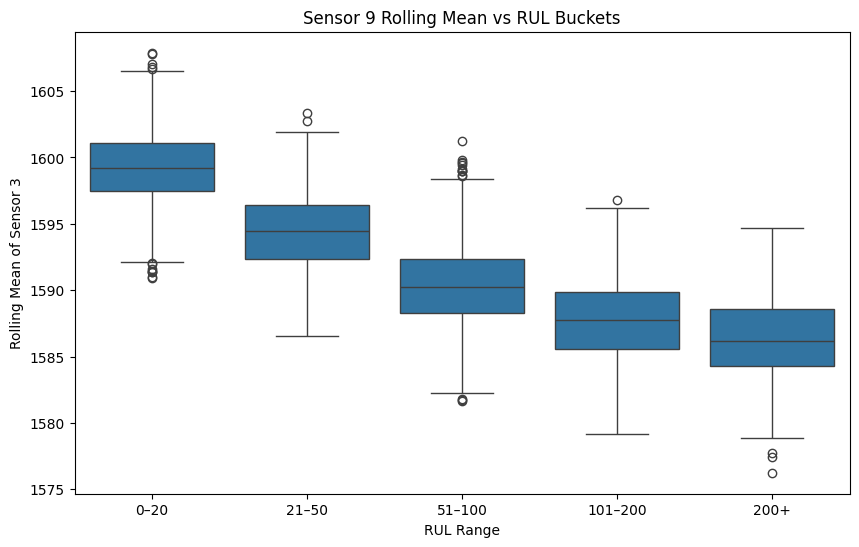

In [11]:
# Create RUL bins for comparison
df["RUL_bin"] = pd.cut(df["RUL"],\
    bins=[0, 20, 50, 100, 200, df["RUL"].max()], \
    labels=["0–20", "21–50", "51–100", "101–200", "200+"])

# Plot boxplot for one feature
plt.figure(figsize=(10, 6))
sns.boxplot(x="RUL_bin", y="sensor_3_roll_mean", data=df)
plt.title("Sensor 9 Rolling Mean vs RUL Buckets")
plt.ylabel("Rolling Mean of Sensor 3")
plt.xlabel("RUL Range")
plt.show()

In [12]:
#Lag features
df = add_lag_features(df,sensor_cols)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_12_lag_1,sensor_12_lag_2,sensor_14_lag_1,sensor_14_lag_2,sensor_17_lag_1,sensor_17_lag_2,sensor_20_lag_1,sensor_20_lag_2,sensor_21_lag_1,sensor_21_lag_2
9588,49,93,-0.0018,0.0001,100.0,643.02,1593.62,1408.16,553.84,9037.25,...,521.04,521.62,8129.80,8127.79,392.0,392.0,38.89,38.94,23.3538,23.2363
11777,60,8,-0.0010,0.0002,100.0,642.63,1588.18,1407.92,553.93,9050.76,...,521.76,521.60,8133.01,8134.75,392.0,392.0,39.04,39.04,23.4062,23.3846
19706,96,155,0.0002,0.0001,100.0,642.38,1583.92,1406.72,554.58,9053.22,...,521.91,521.78,8136.08,8136.50,393.0,392.0,38.91,38.93,23.3923,23.4154
17846,88,51,0.0021,-0.0002,100.0,642.40,1583.52,1403.30,554.45,9065.64,...,522.06,521.91,8144.21,8152.12,392.0,392.0,39.00,39.05,23.2672,23.3028
11596,59,58,0.0009,-0.0002,100.0,642.25,1584.98,1403.11,555.15,9053.93,...,522.48,522.32,8136.56,8137.70,392.0,392.0,39.11,39.05,23.4128,23.4360


In [13]:
df.shape

(20631, 63)

In [14]:
#normalizing the features
feature_cols = [col for col in df.columns if ('sensor_' in col) or ('roll' in col) or ('lag' in col)]
df = scale_features(df,feature_cols)
df.sample(5)

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_12_lag_1,sensor_12_lag_2,sensor_14_lag_1,sensor_14_lag_2,sensor_17_lag_1,sensor_17_lag_2,sensor_20_lag_1,sensor_20_lag_2,sensor_21_lag_1,sensor_21_lag_2
11669,59,131,0.0008,0.0000,100.0,0.334337,0.340092,0.408339,0.560386,0.134030,...,0.646055,0.739872,0.231521,0.244887,0.333333,0.416667,0.651163,0.550388,0.595692,0.587821
17729,87,112,0.0009,-0.0002,100.0,0.515060,0.384347,0.415598,0.621578,0.176434,...,0.434968,0.648188,0.219573,0.243330,0.333333,0.416667,0.465116,0.317829,0.557995,0.604115
12882,65,119,0.0013,0.0001,100.0,0.463855,0.513407,0.417117,0.529791,0.185587,...,0.456290,0.505330,0.137107,0.209037,0.500000,0.416667,0.496124,0.581395,0.617785,0.681304
16690,83,99,0.0011,-0.0002,100.0,0.204819,0.189012,0.142134,0.706924,0.164543,...,0.795309,0.797441,0.204917,0.203590,0.250000,0.416667,0.604651,0.527132,0.771748,0.786385
16035,80,83,0.0024,-0.0004,100.0,0.527108,0.478526,0.488859,0.613527,0.158889,...,0.582090,0.501066,0.219308,0.205925,0.583333,0.500000,0.410853,0.457364,0.416045,0.488401


In [15]:
#adding delta feature 
df = add_delta_features(df,sensor_cols)
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_2,sensor_3,sensor_4,sensor_7,sensor_9,...,sensor_3_delta,sensor_4_delta,sensor_7_delta,sensor_9_delta,sensor_11_delta,sensor_12_delta,sensor_14_delta,sensor_17_delta,sensor_20_delta,sensor_21_delta
0,1,1,-0.0007,-0.0004,100.0,0.183735,0.406802,0.309757,0.726248,0.109755,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,0.283133,0.453019,0.352633,0.628019,0.100242,...,0.046218,0.042876,-0.098229,-0.009513,0.011905,0.132196,-0.036794,0.000000,-0.046512,0.006352
2,1,3,-0.0043,0.0003,100.0,0.343373,0.369523,0.370527,0.710145,0.140043,...,-0.083497,0.017893,0.082126,0.039801,-0.130952,0.029851,0.008979,-0.166667,-0.038760,-0.109638
3,1,4,0.0007,0.0000,100.0,0.343373,0.256159,0.331195,0.740741,0.124518,...,-0.113364,-0.039332,0.030596,-0.015525,-0.083333,0.093817,0.003096,0.166667,-0.054264,0.041011
4,1,5,-0.0019,-0.0002,100.0,0.349398,0.257467,0.404625,0.668277,0.149960,...,0.001308,0.073430,-0.072464,0.025442,0.089286,-0.142857,-0.000155,0.083333,0.015504,0.042115


In [16]:
df.to_csv(f'{BASE_PROCESSED_PATH}/FD001/train_FD001_engineered.csv', index=False)